# **DataCure Team**

# Project Title: Diabetes Prediction Model Using Health and Demographic Data

## Problem Definition

The aim of this project is to predict the likelihood of diabetes in an individual based on their health and demographic data. This binary classification problem will use supervised machine learning to classify outcomes as either Diabetes, Pre-diabetes, or Healthy.

## Objective

To develop a machine learning model that predicts the likelihood of diabetes based on health, lifestyle, and demographic data

## Dataset Description

The dataset sourced from the UCI Machine Learning Repository contains health and demographic information about individuals with the following features:**

1. **HighBP:** High blood pressure status.
2. **HighChol:** High cholesterol status.
3. **CholCheck:** Cholesterol check in the last 5 years.
4. **BMI:** Body Mass Index.
5. **Smoker:** Smoking status.
6. **Stroke:** History of stroke.
7. **HeartDiseaseorAttack:** History of heart disease or heart attack.
8. **PhysActivity:** Physical activity engagement.
9. **Fruits:** Frequency of fruit consumption.
10. **Veggies:** Frequency of vegetable consumption.
11. **HvyAlcoholConsump:** Heavy alcohol consumption.
12. **AnyHealthcare:** Access to healthcare services.
13. **NoDocbcCost:** Could not see a doctor due to cost.
14. **GenHlth:** General health rating (self-reported).
15. **MentHlth:** Days of poor mental health in the last month.
16. **PhysHlth:** Days of poor physical health in the last month.
17. **DiffWalk:** Difficulty walking or climbing stairs.
18. **Sex:** Biological sex.
19. **Age:** Age of the individual.
20. **Education:** Education level.
21. **Income:** Income level.
22. **Outcome:** Target variable with three classes: Diabetes, Pre-diabetes, Healthy.

## Data Collection

The dataset was sourced from the UCI Repository. It was downloaded as a CSV file and loaded into Jupyter Noebook for analysis.

#### Laoding the Libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#### Loading Dataset

In [15]:
df = pd.read_csv('diabetes.csv')

In [17]:
# using just 10,000 rows out of the entire dataset 

# Randomly sample 10,000 rows
df_sampled = df.sample(n=10000, random_state=42)

# Save or use the sampled data
df_sampled.to_csv('sampled_diabetes.csv', index=False)

In [19]:
# loading the new dataset 
df1 = pd.read_csv('sampled_diabetes.csv')

In [21]:
# loading the new dataset 
df1 = pd.read_csv('sampled_diabetes.csv')

In [23]:
# checking the head
df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,2.0,1.0,0.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,20.0,5.0,1.0,0.0,10.0,5.0,2.0
1,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,13.0,6.0,7.0
2,2.0,1.0,0.0,1.0,34.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,11.0,5.0,2.0
3,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,5.0
4,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0


In [25]:
## checking the tail
df1.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
9995,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,4.0,7.0,0.0,0.0,12.0,6.0,8.0
9996,0.0,1.0,1.0,1.0,28.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,4.0,0.0,10.0,0.0,1.0,13.0,4.0,7.0
9997,0.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
9998,2.0,1.0,1.0,1.0,32.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,20.0,1.0,1.0,11.0,5.0,6.0
9999,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,0.0,0.0,1.0,10.0,6.0,2.0


#### Data Cleaning and Preprocessing

##### Basic structure

In [29]:
# Display general information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          10000 non-null  float64
 1   HighBP                10000 non-null  float64
 2   HighChol              10000 non-null  float64
 3   CholCheck             10000 non-null  float64
 4   BMI                   10000 non-null  float64
 5   Smoker                10000 non-null  float64
 6   Stroke                10000 non-null  float64
 7   HeartDiseaseorAttack  10000 non-null  float64
 8   PhysActivity          10000 non-null  float64
 9   Fruits                10000 non-null  float64
 10  Veggies               10000 non-null  float64
 11  HvyAlcoholConsump     10000 non-null  float64
 12  AnyHealthcare         10000 non-null  float64
 13  NoDocbcCost           10000 non-null  float64
 14  GenHlth               10000 non-null  float64
 15  MentHlth            

In [31]:
## checking the number of rows and columns 
df1.shape

(10000, 22)

In [33]:
# Listing all the columns
df1.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [35]:
# Renaming column
df1.rename(columns={'Diabetes_012': 'Outcome'},
          inplace=True, errors='raise')

In [37]:
#  Checking the statistical summary for numerical columns
df1.describe()

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.298800,0.427900,0.42160,0.961000,28.4452,0.447700,0.041900,0.094200,0.765300,0.640200,...,0.952200,0.07730,2.50260,3.119500,4.224200,0.16520,0.437500,8.058500,5.081900,6.123100
std,0.700691,0.494799,0.49384,0.193605,6.8249,0.497282,0.200371,0.292121,0.423832,0.479966,...,0.213353,0.26708,1.06532,7.321378,8.729568,0.37138,0.496103,3.063661,0.966171,2.026168
min,0.000000,0.000000,0.00000,0.000000,13.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.00000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.00000,1.000000,24.0000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.00000,2.00000,0.000000,0.000000,0.00000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.00000,1.000000,27.0000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.00000,2.00000,0.000000,0.000000,0.00000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.00000,1.000000,31.0000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.00000,3.00000,2.000000,3.000000,0.00000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.00000,1.000000,92.0000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.00000,30.000000,30.000000,1.00000,1.000000,13.000000,6.000000,8.000000


In [39]:
# Checking for missing values
df1.isnull().sum()

Outcome                 0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [41]:
# Checking the unique values for each column
for i in df1.columns:
    i = df1.value_counts(i)
    print(f'\n\n\nValues of {i}')




Values of Outcome
0.0    8419
2.0    1407
1.0     174
Name: count, dtype: int64



Values of HighBP
0.0    5721
1.0    4279
Name: count, dtype: int64



Values of HighChol
0.0    5784
1.0    4216
Name: count, dtype: int64



Values of CholCheck
1.0    9610
0.0     390
Name: count, dtype: int64



Values of BMI
27.0    1028
26.0     774
24.0     749
25.0     649
23.0     623
        ... 
67.0       1
61.0       1
58.0       1
14.0       1
92.0       1
Name: count, Length: 62, dtype: int64



Values of Smoker
0.0    5523
1.0    4477
Name: count, dtype: int64



Values of Stroke
0.0    9581
1.0     419
Name: count, dtype: int64



Values of HeartDiseaseorAttack
0.0    9058
1.0     942
Name: count, dtype: int64



Values of PhysActivity
1.0    7653
0.0    2347
Name: count, dtype: int64



Values of Fruits
1.0    6402
0.0    3598
Name: count, dtype: int64



Values of Veggies
1.0    8063
0.0    1937
Name: count, dtype: int64



Values of HvyAlcoholConsump
0.0    9404
1.0     596
Name: co

In [43]:
# Checking for duplicate rows
df1.duplicated().sum()

135

We have about 135 duplicate rows from the sampled dataset. Hence we will remove them

In [46]:
# Removing duplicate rows
df1 = df1.drop_duplicates()

In [48]:
# Reconfirming if we still have duplicate rows
df1.duplicated().sum()

0

In [50]:
# checking the new shape of our data
df1.shape

(9865, 22)

After removing the duplicate rows, we now have 9865 rows and 22 columns

#### **Key Assumptions**
The dataset consists entirely of float64 data types, indicating preprocessing, encoding, and standardization have already been applied.
The target variable Diabetes_012 has been renamed to Outcome for clarity.

In [54]:
print(df1['Outcome'].value_counts())

Outcome
0.0    8284
2.0    1407
1.0     174
Name: count, dtype: int64


C:\Users\STUTERN\AppData\Local\Temp\ipykernel_17080\3070530558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df1, palette='coolwarm')


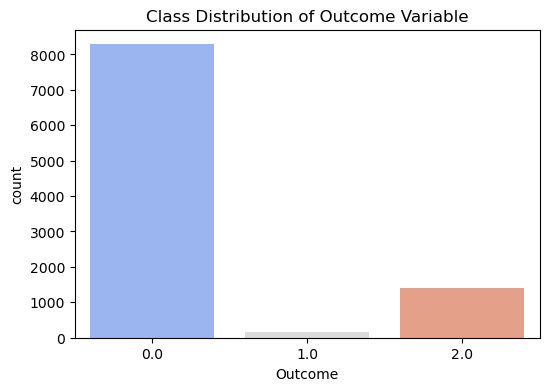

In [56]:
# Countplot for Outcome Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df1, palette='coolwarm')
plt.title("Class Distribution of Outcome Variable")
plt.savefig("outcome_distribution.png", dpi = 300)
plt.show()

C:\Users\STUTERN\AppData\Local\Temp\ipykernel_17080\3692846862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df1, palette='coolwarm')


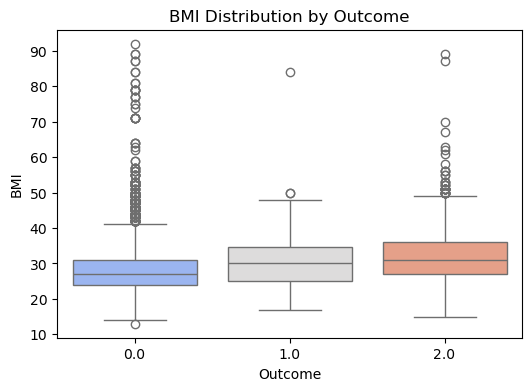

In [58]:
# Boxplot for BMI by Outcome
plt.figure(figsize=(6, 4))
sns.boxplot(x='Outcome', y='BMI', data=df1, palette='coolwarm')
plt.title("BMI Distribution by Outcome")
plt.savefig("bmi_boxplot.png", dpi = 300)
plt.show()

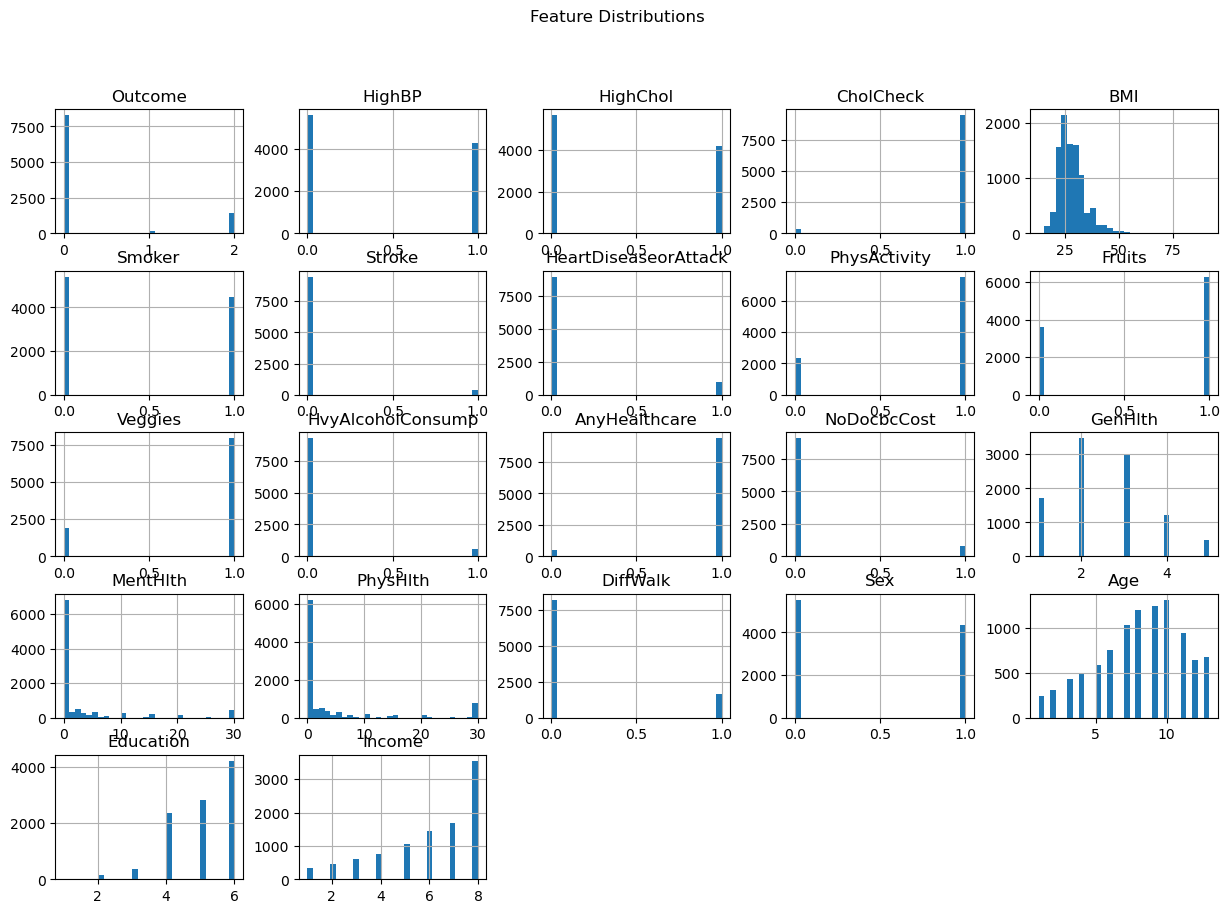

In [60]:
df1.hist(bins=30, figsize=(15, 10)) 
plt.suptitle('Feature Distributions') 
plt.savefig("Feature Distribution.png", dpi=300, bbox_inches='tight') # Save the plot 
plt.show()

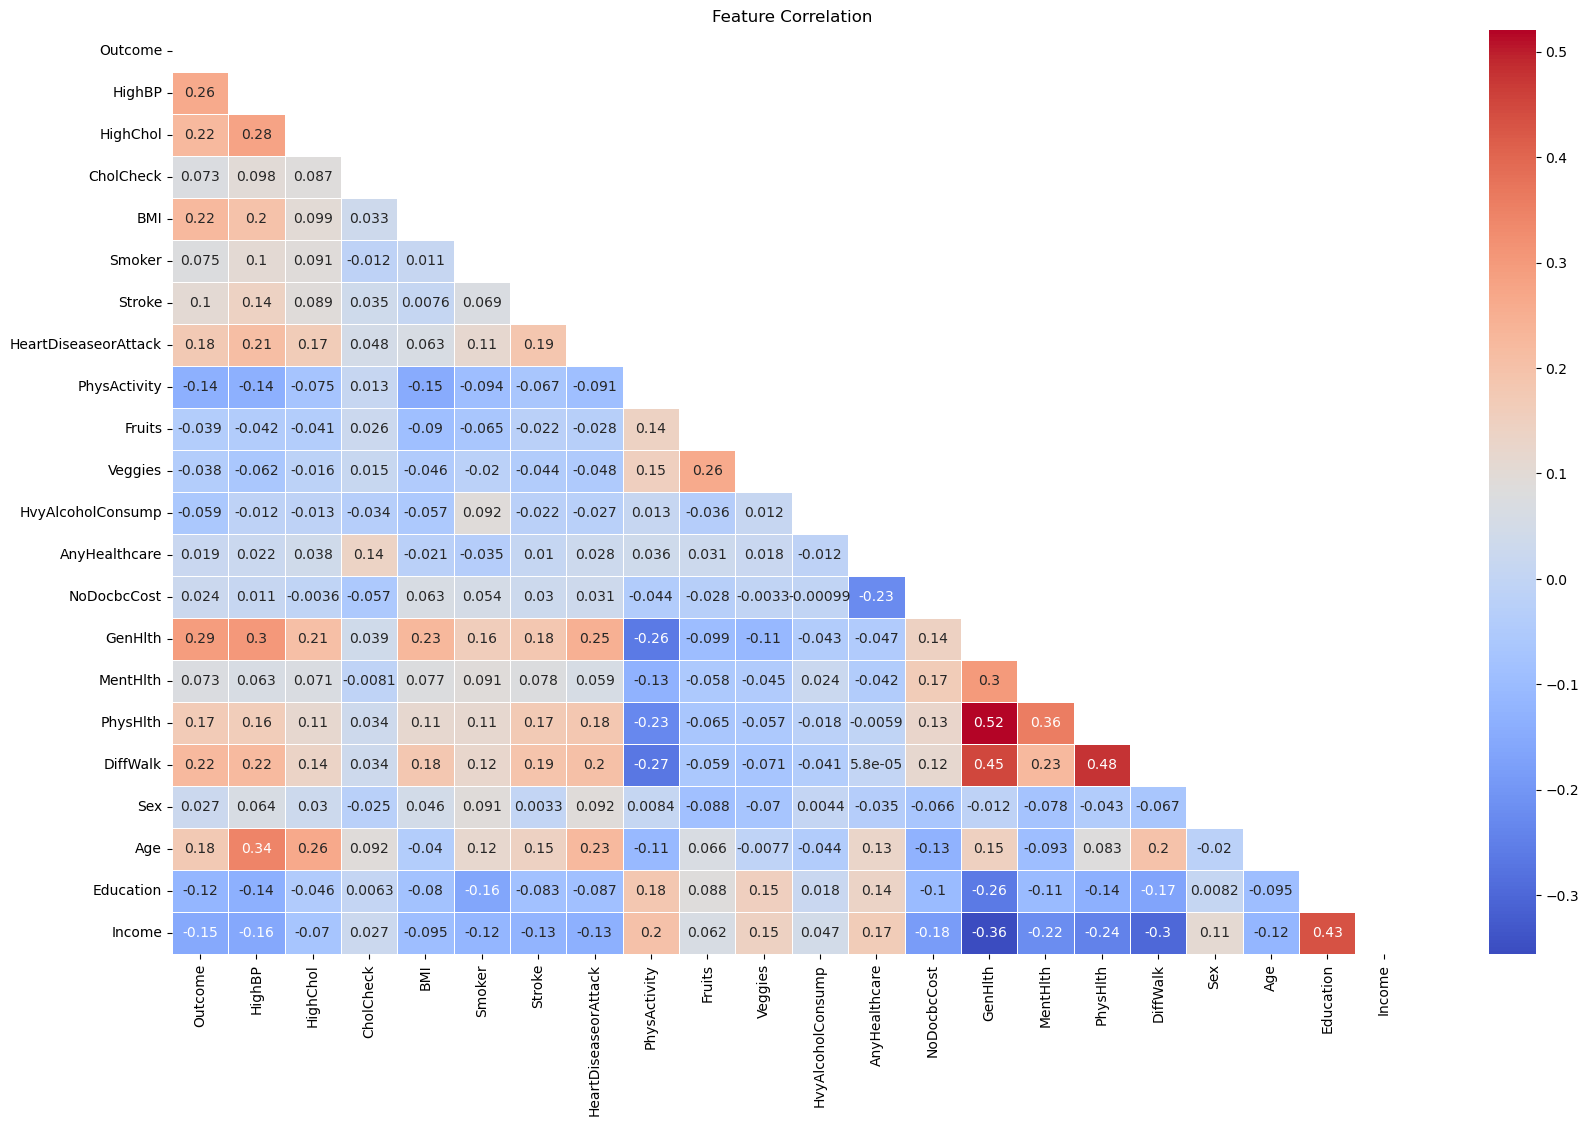

In [62]:
# using the upper triangle matrix as mask 
matrix = np.triu(df1.corr())

plt.figure(figsize=(20,12))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=matrix)
plt.title("Feature Correlation")
plt.savefig("Feature Correlation.png", dpi=300, bbox_inches='tight') # Save the plot 
plt.show()

#### Summary of Correlations with the Target Column (Outcome)
The following columns has a very strong or high correlation with the target columns; HighBP, BMI, Age, GenHlth, PhysHlth, HighChol. While the following column has low correlation with the target variable and hence has low impact in the prediction. They include; Smoker, Fruits & Veggies, HvyAlcoholConsump, Sex, AnyHealthcare, and CholCheck.

The following columns could be excluded since they have very low or no correlation with the target variable and are unlikely to impact predictions significantly include:
Smoker
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
Sex
CholCheck

### Feature Engineering

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [68]:
df1.head()

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,2.0,1.0,0.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,20.0,5.0,1.0,0.0,10.0,5.0,2.0
1,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,13.0,6.0,7.0
2,2.0,1.0,0.0,1.0,34.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,11.0,5.0,2.0
3,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,5.0
4,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0


In [70]:
df1.tail()

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
9995,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,4.0,7.0,0.0,0.0,12.0,6.0,8.0
9996,0.0,1.0,1.0,1.0,28.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,4.0,0.0,10.0,0.0,1.0,13.0,4.0,7.0
9997,0.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
9998,2.0,1.0,1.0,1.0,32.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,20.0,1.0,1.0,11.0,5.0,6.0
9999,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,0.0,0.0,1.0,10.0,6.0,2.0


In [72]:
df1.columns

Index(['Outcome', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [74]:
# Prepare features and target
X = df1[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
        'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
         'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
y = df1['Outcome']

##### Train-Test Split

In [77]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7892, 21)
(1973, 21)
(7892,)
(1973,)


In [81]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
#Logistic Regression
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

# Random Forest Classifier
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

# Gradient Boosting Classifier
model_3 = GradientBoostingClassifier()
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

# Support Vector Classifier (SVC)
model_4 = SVC()
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)

# Function to print metrics for each model
def print_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Print metrics for each model
print_metrics(y_test, y_pred_1, "Logistic Regression")
print_metrics(y_test, y_pred_2, "Random Forest Classifier")
print_metrics(y_test, y_pred_3, "Gradient Boosting Classifier")
print_metrics(y_test, y_pred_4, "Support Vector Classifier")

C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: Undefine


Metrics for Logistic Regression:
Accuracy: 0.84
Precision: 0.79
Recall: 0.84
F1 Score: 0.81
Confusion Matrix:
[[1605    0   54]
 [  36    0    2]
 [ 222    0   54]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1659
         1.0       0.00      0.00      0.00        38
         2.0       0.49      0.20      0.28       276

    accuracy                           0.84      1973
   macro avg       0.45      0.39      0.40      1973
weighted avg       0.79      0.84      0.81      1973


Metrics for Random Forest Classifier:
Accuracy: 0.84
Precision: 0.79
Recall: 0.84
F1 Score: 0.80
Confusion Matrix:
[[1616    0   43]
 [  33    0    5]
 [ 231    0   45]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1659
         1.0       0.00      0.00      0.00        38
         2.0       0.48      0.16      0.24       276

    accuracy    

C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: Undefine

## Summary of performances of the four models

1. **Support Vector Classifier (SVC)**: 
   - **Accuracy**: 0.84, **Precision**: 0.80, **Recall**: 0.84, **F1 Score**: 0.79.
   - Strong recall and decent precision, but its F1 score is slightly lower than other models, indicating less balanced performance. It has a good ability to correctly classify positive instances, but false negatives could be an issue.

2. **Gradient Boosting Classifier**: 
   - **Accuracy**: 0.85, **Precision**: 0.80, **Recall**: 0.85, **F1 Score**: 0.81.
   - The highest accuracy, recall, and F1 score among the models, making it a well-rounded performer. While computationally more intensive, its performance justifies its deployment if resources allow.

3. **Random Forest Classifier**: 
   - **Accuracy**: 0.84, **Precision**: 0.79, **Recall**: 0.84, **F1 Score**: 0.80.
   - Offers a good balance between accuracy and recall but performs slightly lower in precision than Gradient Boosting. It’s easier to deploy and less resource-intensive.

4. **Logistic Regression**: 
   - **Accuracy**: 0.84, **Precision**: 0.80, **Recall**: 0.84, **F1 Score**: 0.80.
   - While interpretable and simple to deploy, it performs similarly to SVC and Random Forest but lacks the extra performance boost seen in Gradient Boosting.

**Conclusion**: The **Random Forest** was chosen as the best model for deployment due to its highest accuracy, recall, and F1 score, making it the most balanced and robust choice.

### Saving the best performing model

In [89]:
import pickle
import joblib

In [91]:
joblib.dump(model_2, '3mtt_random_forest.joblib')
print("Random Forest model has been saved successfully as 3mtt_random_forest.joblib")

Random Forest model has been saved successfully as 3mtt_random_forest.joblib


In [93]:
scaler_name = 'scaler_3mtt.joblib'
joblib.dump(scaler, scaler_name)
print("Scaler has been saved successfully as scaler_3mtt.joblib")

Scaler has been saved successfully as scaler_3mtt.joblib


In [95]:
filename = '3mtt_gradient_boosting.sav'
pickle.dump(model_3, open(filename, 'wb'))

In [97]:
filename = '3mtt_random_Forest.sav'
pickle.dump(model_2, open(filename, 'wb'))

In [99]:
# Saving scaler object with pickle
scaler_name = 'scaler_3mtt.pkl'
pickle.dump(scaler, open(scaler_name, 'wb'))